# Fire Hazard Incidents Analytics Pipeline
## Ignition Cause vs Count

## Importing Required Libraries

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

from storedb import save_in_db, IMG_PATH

## Creating Spark Session and using all available cores

In [2]:
%%time
spark = SparkSession \
    .builder \
    .appName("532: Project") \
    .config("local[4]") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/13 00:02:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.
22/12/13 00:02:33 WARN Utils: Service 'SparkUI' could not bind on port 4047. Attempting port 4048.
CPU times: user 19.2 ms, sys: 26.5 ms, total: 45.7 ms
Wall time: 

## Loading Ignition Cause data

In [4]:
%%time
fire_incidents_df = spark.read.options(delimiter="^", header=True).csv("fireincident.txt")
ignition_cause = fire_incidents_df.na.drop(subset=("CAUSE_IGN"))

CPU times: user 4.04 ms, sys: 5.08 ms, total: 9.13 ms
Wall time: 3 s


In [5]:
%%time
ignition_cause = ignition_cause.groupBy("CAUSE_IGN").count()

CPU times: user 3.1 ms, sys: 2.71 ms, total: 5.82 ms
Wall time: 55.9 ms


In [6]:
%%time
p_ignition_cause = ignition_cause.toPandas()
p_ignition_cause["count"] = p_ignition_cause["count"]/1e03

CPU times: user 285 ms, sys: 110 ms, total: 395 ms
Wall time: 2.24 s


CPU times: user 86.5 ms, sys: 32.4 ms, total: 119 ms
Wall time: 135 ms


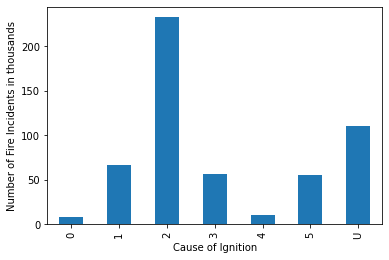

In [8]:
%%time
ptest = p_ignition_cause.sort_values(by="CAUSE_IGN").plot(x="CAUSE_IGN", y="count", xlabel="Cause of Ignition", ylabel = "Number of Fire Incidents in thousands", legend = False, kind="bar")

fig_name = "cause_ignition_number.png"
fig1 = ptest.get_figure()
fig1.savefig(f"{IMG_PATH}{fig_name}")

# saving to db
save_in_db(fig_name, "ignition_cause_count")
